In [3]:
# ..................................................................................
# algoritmo PSO que minimiza la funcion unimodal f(x) = (x - a)^2 + (y + b)^2
# ..................................................................................

import numpy as np

# funcion objetivo hiperboloide eliptico
def funcion_objetivo(x,y, a=0, b=0):
    return (x-a)**2 + (y+b)**2

In [4]:
# parametros
num_particulas = 20  # numero de particulas
dim = 2  # dimensiones
cantidad_iteraciones = 10  # maximo numero de iteraciones
c1 = 2  # componente cognitivo
c2 = 2  # componente social
w = 0.7  # factor de inercia
limite_inf = -100   # limite inferior de busqueda
limite_sup = 100    # limite superior de busqueda

In [5]:
a = float(input('Introducir a:').strip() or (a if 'a' in vars() else '0'))
b = float(input('Introducir b:').strip() or (b if 'b' in vars() else '0'))
print('a: ',a,'\nb: ',b )

a:  12.0 
b:  35.0


In [6]:
# inicializacion
particulas = np.random.uniform(limite_inf, limite_sup, (num_particulas, dim))  # posiciones iniciales de las particulas

velocidades = np.zeros((num_particulas, dim))  # inicializacion de la matriz de velocidades en cero

# inicializacion de pbest y gbest
pbest = particulas.copy()  # mejores posiciones personales iniciales

fitness_pbest = np.empty(num_particulas)  # mejores fitness personales iniciales
for i in range(num_particulas):
    fitness_pbest[i] = funcion_objetivo(*particulas[i], a=a, b=b)

gbest = pbest[np.argmin(fitness_pbest)]  # mejor posicion global inicial
fitness_gbest = np.min(fitness_pbest)  # fitness global inicial
print(f"Mejor posición global Inicial {gbest}, Valor {fitness_gbest}")

Mejor posición global Inicial [ 15.92237081 -45.36584409], Valor 122.8357165664901


In [7]:
# busqueda
gbests = np.empty((cantidad_iteraciones,2)) #creo este array para almacenar los gbest de cada iteracion
for iteracion in range(cantidad_iteraciones):
    for i in range(num_particulas):  # iteracion sobre cada partícula
        r1, r2 = np.random.rand(), np.random.rand()  # generacion dos numeros aleatorios

        # actualizacion de la velocidad de la particula en cada dimension
        for d in range(dim):
            velocidades[i][d] = (w * velocidades[i][d] + c1 * r1 * (pbest[i][d] - particulas[i][d]) + c2 * r2 * (gbest[d] - particulas[i][d]))

        for d in range(dim):
            particulas[i][d] = particulas[i][d] + velocidades[i][d]  # cctualizacion de la posicion de la particula en cada dimension

            # mantenimiento de las partículas dentro de los limites
            particulas[i][d] = np.clip(particulas[i][d], limite_inf, limite_sup)

        fitness = funcion_objetivo(*particulas[i], a=a, b=b)  # Evaluacion de la funcion objetivo para la nueva posicion

        # actualizacion el mejor personal
        if fitness < fitness_pbest[i]:
            fitness_pbest[i] = fitness  # actualizacion del mejor fitness personal
            pbest[i] = particulas[i].copy()  # actualizacion de la mejor posicion personal

            # actualizacion del mejor global
            if fitness < fitness_gbest:
                fitness_gbest = fitness  # actualizacion del mejor fitness global
                gbest = particulas[i].copy()  # actualizacion de la mejor posicion global

    # imprimir el mejor global en cada iteracion
    print(f"Iteración {iteracion + 1}: Mejor posición global {gbest}, Valor {fitness_gbest}")
    # gbests[iteracion,0] = gbest
    gbests[iteracion,1] = fitness_gbest

# resultado
solucion_optima = gbest  # mejor posicion global final
valor_optimo = fitness_gbest  # mejor fitness global final

print("\nSolucion optima (x):", solucion_optima)
print("Valor optimo:", valor_optimo)

Iteración 1: Mejor posición global [ 17.29041418 -41.89170071], Valor 75.4840208221566
Iteración 2: Mejor posición global [ 18.39992015 -39.0741125 ], Valor 57.55737061689368
Iteración 3: Mejor posición global [ 18.39992015 -39.0741125 ], Valor 57.55737061689368
Iteración 4: Mejor posición global [ 10.23690705 -37.62266456], Valor 9.986866134759065
Iteración 5: Mejor posición global [ 10.98621119 -32.29041332], Valor 8.369627698750097
Iteración 6: Mejor posición global [ 10.98621119 -32.29041332], Valor 8.369627698750097
Iteración 7: Mejor posición global [ 11.41547716 -36.42734352], Valor 2.3789764727609684
Iteración 8: Mejor posición global [ 11.41547716 -36.42734352], Valor 2.3789764727609684
Iteración 9: Mejor posición global [ 11.41547716 -36.42734352], Valor 2.3789764727609684
Iteración 10: Mejor posición global [ 11.89581737 -36.18031413], Valor 1.4039954723369006

Solucion optima (x): [ 11.89581737 -36.18031413]
Valor optimo: 1.4039954723369006


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

X = np.linspace(limite_inf, limite_sup, 100)
Y = np.linspace(limite_inf, limite_sup, 100)

X, Y = np.meshgrid(X, Y)

C = funcion_objetivo(X, Y, a=a, b=b)

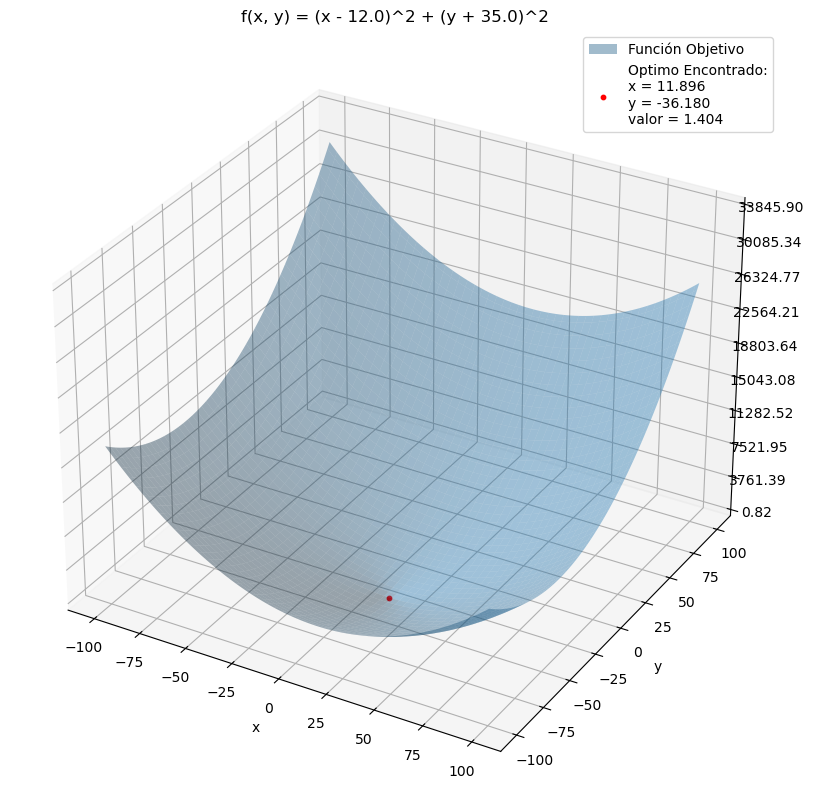

In [15]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, C,
                       linewidth=0, antialiased=True, alpha=0.4,
                       label='Función Objetivo')

# Customize the z axis.
ax.set_zlim(C.min()-C.min()*.1, C.max()+C.max()*.1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
f_de_x_y = f'f(x, y) = (x - {a})^2 + (y + {b})^2'

fig.set_size_inches(10,10)
ax.set_title(f_de_x_y)
ax.set_xlabel("x")
ax.set_ylabel("y")


leyenda = f'Optimo Encontrado:\nx = {solucion_optima[0]:.3f}\ny = {solucion_optima[1]:.3f}\nvalor = {valor_optimo:.3f}'

ax.scatter(*solucion_optima, valor_optimo, c='red', marker='o', s=10, label=leyenda)

plt.legend()

# ax.view_init()

plt.show()


In [11]:
f_de_x_y

'f(x) = (x - 12.0)^2 + (y + 35.0)^2'

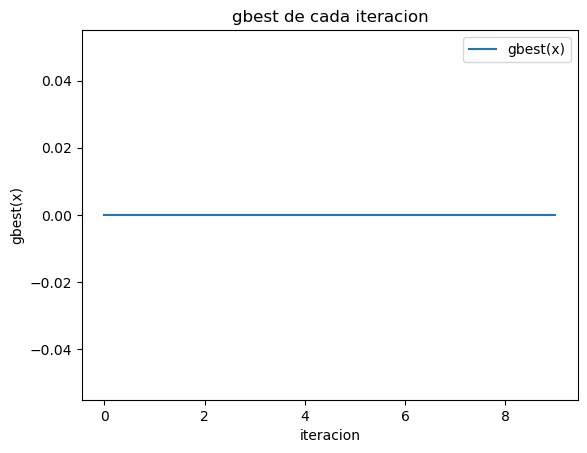

In [10]:
plt.plot(gbests[:,0], label='gbest(x)')
# plt.plot(gbests[:,1], label='fitness_gbest(y)')
plt.title('gbest de cada iteracion')
plt.xlabel('iteracion')
plt.ylabel('gbest(x)')
plt.legend()
plt.show()